___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [28]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

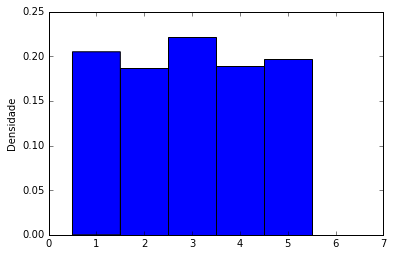

In [29]:
L = []
for i in range (1000):
    L.append(randint(1,6))
    
print()
plt.hist(L, bins = np.arange(0.5, 7, 1), normed = 1)
plt.ylabel("Densidade")
plt.show()
    

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

In [30]:
ps = 0
pn = 0
L = [1, 2, 3, 4, 5, 6]

for i in L:
    for j in L:
        s = i+j
        if s == 7:
            ps +=1
        else:
            pn +=1
            
ps = ps*100/36
pn = pn*100/36

print ("A probabilidade de obter a soma 7 é de: ", ps, "%")


A probabilidade de obter a soma 7 é de:  16.666666666666668 %


In [33]:
ps = 0
pn = 0

for j in L:
    s = 1+j
    if s == 7:
        ps +=1
    else:
        pn += 1
        
ps = ps*100/36
pn = pn*100/36

print ("A probabilidade de obter a soma 7 é: ", ps, "%")

A probabilidade de obter a soma 7 é:  2.7777777777777777 %


___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [40]:
def vabt (prm, esc):
    if esc == 1:
        abt = shuffle([2,3])
    elif esc == 2:
        abt = shuffle ([1,3])
    else:
        abt = shuffle([1,2])
    
    return abt

def vg (prm, esc, abt):
    if esc == prm:
        return 0
    elif (esc != prm) and (abt != prm):
        return 1
    else:
        return 0
    
    

g = 0


for i in range (10000):
    prm = randint(1,3)
    esc = randint (1,3)
    abt = vabt(prm, esc)
    g += vg(prm, esc, abt)
    
    
print ("O indivíduo teve uma porcentagem de ganho de: ", g*100/10000, "%")


O indivíduo teve uma porcentagem de ganho de:  49.66 %
